<a href="https://colab.research.google.com/github/dqdung1604/AI_Sem2_2022-2023/blob/main/Code_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


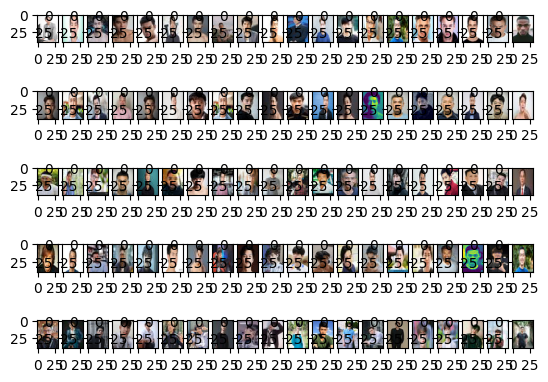

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Gender'

for i in range (100):
  plt.subplot(5, 20, i+1)
  file_name = folder + '/Male ('+ str(i+1) +').jpg'
  img = imread(file_name)
  plt.imshow(img)
plt.show()

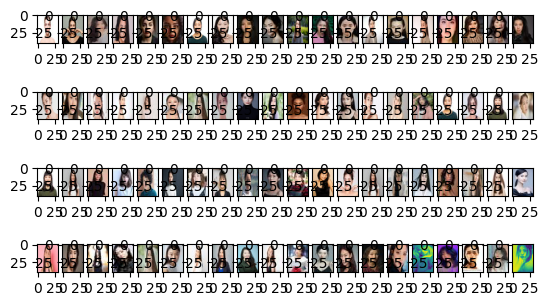

In [ ]:
for i in range (80):
  plt.subplot(5, 20, i+1)
  file_name = folder + '/Female ('+ str(i+1) +').jpg'
  img = imread(file_name)
  plt.imshow(img)
plt.show()

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Gender/'
photos, labels = list(), list()

for file in listdir(folder):
  output = 0.0
  if file.startswith('Male'):
    output = 1
  if file.startswith('Female'):
    output = 2
  img = load_img(folder + file, target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('Gender_photos.npy', photos)
save('Gender_labels.npy', labels)

(200, 30, 40, 3) (200,)


In [ ]:
import numpy as np
x_train = np.load('/content/Gender_photos.npy')
y_train = np.load('/content/Gender_labels.npy')
print(x_train.shape)
print(y_train.shape)

(200, 30, 40, 3)
(200,)


In [ ]:
x_train = x_train.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_train.shape

(200, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (30, 40, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10, activation = 'softmax'))
from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])
model.summary()
train = model.fit(x_train, y_train, batch_size = 128, epochs = 500, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 20, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                      

1/1 [==============================] - 0s 126ms/step


'Female'

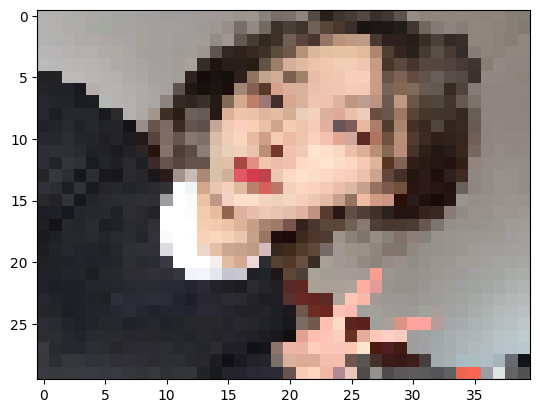

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1:'Male',
       2:'Female'}
img = load_img('/content/drive/MyDrive/Test (1).jpg',target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

In [ ]:
#from tensorflow import keras
#filename = "Gender_Detection.h5"
#model.save(filename)